In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


In [7]:

wine = pd.read_csv('winequality.csv', sep = ',')

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  color                 6497 non-null   int64  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [10]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
color                   0
quality                 0
dtype: int64

In [11]:
label_quality = LabelEncoder()

In [12]:
wine['color'] = label_quality.fit_transform(wine['color'])

In [13]:
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1,5


In [14]:
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

/home/paulm/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

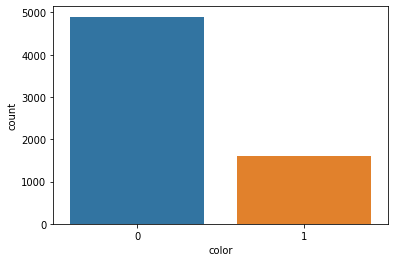

In [15]:
sns.countplot(wine['color'])

In [16]:
#Now separating the dataset as reponse variable and feature
X = wine.drop('color', axis = 1)
y = wine['color']

In [17]:
# Applying Standard Scaler to X

sc = StandardScaler()
X= sc.fit_transform(X)
#X_test = sc.transform(X_test)

#X_train =sc.fit_transform(X_train)
#X_validation = sc.transform(X_validation)

In [18]:
#Train and test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.2, random_state=0)

In [19]:
X_train[:10]

array([[-0.70607349, -0.30169391, -0.60997343,  1.84064731, -0.54334485,
        -0.36766435, -0.29627236,  0.19455641, -0.86145853, -1.016626  ,
         0.09072393,  0.20799905],
       [-0.47465165, -0.6054167 , -0.12823371,  1.58841068, -0.11515151,
        -0.70572997,  0.48224751,  1.18507075,  0.94230643, -0.27735097,
        -0.91546416,  0.20799905],
       [-0.70607349, -0.24094936, -0.54115347,  0.24314868, -0.45770618,
         0.42115542,  0.44686024,  0.10117459,  0.00932455, -0.41176462,
        -0.83161516, -0.93722961],
       [-0.39751104, -0.24094936,  1.24816549,  1.39923321, -0.31497507,
         0.42115542,  0.19914937,  0.90159022, -1.1102537 , -0.00852369,
        -1.3347092 ,  0.20799905],
       [-0.16608919, -1.39509594,  0.00940621, -0.1772457 ,  0.0275796 ,
         1.60438508,  0.49994114,  0.3012785 ,  2.06188468, -0.61338508,
        -0.91546416,  1.35322771],
       [ 0.29675449, -0.1802048 ,  1.17934553, -0.31387387, -0.34352129,
        -0.19863155,  

In [20]:
# Random Forest Classifer
rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


In [21]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [22]:
X_test[:10]

array([[-0.70607349, -0.96988404, -0.54115347, -0.42948232, -0.08660529,
        -0.59304143,  0.05760031, -0.32237868, -0.67486215, -0.07573051,
        -1.08316218,  0.20799905],
       [-0.32037042, -1.21286227, -0.95407324, -0.8498767 , -0.25788263,
        -0.02959874, -0.45551506, -1.01940728,  0.32031851,  0.05868313,
         0.59381798,  0.20799905],
       [ 0.06533265, -0.72690581,  1.24816549,  1.73554871, -0.20079018,
         1.43535228,  1.29615464,  1.56860324,  0.13372214,  0.86516498,
        -1.2508602 ,  0.20799905],
       [ 0.29675449,  2.00659925, -1.22935308, -0.82885698,  0.51286537,
        -0.31132009,  0.92458834, -0.33238387, -1.0480549 , -0.14293733,
        -0.99931317, -0.93722961],
       [ 0.06533265, -0.78765037, -0.19705367, -0.80783726, -0.62898351,
        -0.08594301,  0.03990667, -0.99939689,  0.50691489, -0.21014415,
         0.42611996,  2.49845638],
       [-0.16608919, -1.33435138, -0.88525328, -0.11418654, -0.02951285,
        -0.19863155,  

In [23]:
#let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       0.99      1.00      0.99       311

    accuracy                           1.00      1300
   macro avg       0.99      1.00      0.99      1300
weighted avg       1.00      1.00      1.00      1300



In [24]:
print(confusion_matrix(y_test, pred_rfc))

[[985   4]
 [  1 310]]


In [25]:
#support vector Classifier

clf = svm.SVC(C=0.28)
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [26]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       0.99      0.99      0.99       311

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

[[987   2]
 [  2 309]]


In [27]:
#Validation set for SVM
pred_clf2 = clf.predict(X_validation)
pred_clf2[:20]
X_validation[:10]
#let's see how our model performed
print(classification_report(y_validation, pred_clf2))
print(confusion_matrix(y_validation, pred_clf2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       809
           1       0.99      0.99      0.99       231

    accuracy                           1.00      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       1.00      1.00      1.00      1040

[[806   3]
 [  2 229]]


In [28]:
# neural network

mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [29]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       0.99      0.99      0.99       311

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

[[987   2]
 [  2 309]]


In [30]:
#accuracy for RFC

from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, pred_rfc)
rfc_acc

0.9961538461538462

In [31]:
#accuracy for neural network
nn = accuracy_score(y_test, pred_mlpc)
nn

0.9969230769230769

In [32]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1,5


In [33]:
#Logistic Regression
 
X= X_train
y= y_train
clf2 = LogisticRegression(random_state=0, C = 1/0.40).fit(X, y)
clf2.predict(X[:10, :])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [34]:
clf2.predict_proba(X[:10, :])

array([[9.99803868e-01, 1.96131559e-04],
       [9.99263546e-01, 7.36453658e-04],
       [9.99113665e-01, 8.86335195e-04],
       [9.99231201e-01, 7.68799023e-04],
       [9.90100987e-01, 9.89901333e-03],
       [9.94255549e-01, 5.74445145e-03],
       [9.99935618e-01, 6.43820379e-05],
       [5.83447801e-03, 9.94165522e-01],
       [9.99987161e-01, 1.28388107e-05],
       [9.99773714e-01, 2.26285566e-04]])

In [35]:
#score from training set for LG
clf2.score(X, y)

0.995669954293962

In [36]:
#score from test set for LG
clf2.score(X_test, y_test)

0.9938461538461538

In [37]:
clf2.decision_function(X)

array([-8.53652875, -7.21292752, -7.02752863, ..., -3.66569943,
       10.07026214, -7.65457549])

In [38]:
clf2.predict_proba(X[:10, :])

array([[9.99803868e-01, 1.96131559e-04],
       [9.99263546e-01, 7.36453658e-04],
       [9.99113665e-01, 8.86335195e-04],
       [9.99231201e-01, 7.68799023e-04],
       [9.90100987e-01, 9.89901333e-03],
       [9.94255549e-01, 5.74445145e-03],
       [9.99935618e-01, 6.43820379e-05],
       [5.83447801e-03, 9.94165522e-01],
       [9.99987161e-01, 1.28388107e-05],
       [9.99773714e-01, 2.26285566e-04]])

In [39]:
clf2.decision_function(X)

array([-8.53652875, -7.21292752, -7.02752863, ..., -3.66569943,
       10.07026214, -7.65457549])

In [40]:

#Validation set for logistic regression
logreg = clf2.predict(X_validation)
logreg[:20]
X_validation[:10]

#let's see how our model performed
print(classification_report(y_validation, logreg))
print(confusion_matrix(y_validation, logreg))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       809
           1       0.98      1.00      0.99       231

    accuracy                           0.99      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040

[[804   5]
 [  1 230]]


In [41]:
#Accuracy of Validation Set
clf2.score(X_validation, y_validation)

0.9942307692307693

In [42]:
# We picked a random numbers for the physiochemical, then tested data on SVM. 0 = bad, 1 = good.
Xpick = [[8.2 ,1.28 ,0.42 , 5.0 ,0.075 ,15.0, 42.0, 0.9966, 3.56, 0.57, 1, 8.0]]
Xpick = sc.transform(Xpick)
ypick = clf.predict(Xpick)
ypick

array([0])